<a href="https://colab.research.google.com/github/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/blob/main/C%C3%B3digo_2_70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Datos%20Testeo%20con%2070.csv')

In [ ]:
print(df)

        v    RH    u  N     PA     CW   No
0    14.5  68.6  0.7  2  884.0  0.042  122
1    20.9  48.6  0.6  0  883.4  0.000  130
2    18.4  54.0  0.6  0  887.1  0.028  102
3    14.8  41.4  0.7  8  890.0  0.014  155
4     6.1  96.4  1.0  7  888.7  0.028  183
..    ...   ...  ... ..    ...    ...  ...
126  17.5  62.5  0.5  0  887.1  0.056  101
127  17.1  30.6  1.2  2  889.1  0.000   12
128  15.8  68.6  0.8  0  886.6  0.042  128
129  21.6  16.7  0.8  2  887.0  0.000   36
130  17.2  61.8  0.8  0  884.5  0.028   98

[131 rows x 7 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02 4.200e-02 1.220e+02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02 0.000e+00 1.300e+02]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02 2.800e-02 1.020e+02]
 [1.480e+01 4.140e+01 7.000e-01 8.000e+00 8.900e+02 1.400e-02 1.550e+02]
 [6.100e+00 9.640e+01 1.000e+00 7.000e+00 8.887e+02 2.800e-02 1.830e+02]
 [1.730e+01 6.300e+01 9.000e-01 0.000e+00 8.852e+02 5.600e-02 1.150e+02]
 [1.670e+01 4.390e+01 7.000e-01 0.000e+00 8.888e+02 0.000e+00 8.300e+01]
 [1.900e+01 4.540e+01 8.000e-01 0.000e+00 8.841e+02 4.200e-02 9.500e+01]
 [1.740e+01 2.760e+01 1.000e+00 0.000e+00 8.879e+02 5.600e-02 1.650e+02]
 [7.200e+00 7.940e+01 1.500e+00 2.000e+00 8.900e+02 2.220e-01 1.800e+01]
 [7.100e+00 8.610e+01 1.300e+00 8.000e+00 8.882e+02 1.110e-01 1.400e+01]
 [1.520e+01 6.450e+01 9.000e-01 2.000e+00 8.850e+02 2.800e-02 1.210e+02]
 [1.430e+01 6.190e+01 6.000e-01 0.000e+00 8.864e+02 0.000e+00 3.100e+01]
 [1.260e+01 7.950e+01 9.000e-01 2.000e+00 8.864e+02

# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,0:5]
Y=dataset[:,5]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02]
 [1.480e+01 4.140e+01 7.000e-01 8.000e+00 8.900e+02]
 [6.100e+00 9.640e+01 1.000e+00 7.000e+00 8.887e+02]
 [1.730e+01 6.300e+01 9.000e-01 0.000e+00 8.852e+02]
 [1.670e+01 4.390e+01 7.000e-01 0.000e+00 8.888e+02]
 [1.900e+01 4.540e+01 8.000e-01 0.000e+00 8.841e+02]
 [1.740e+01 2.760e+01 1.000e+00 0.000e+00 8.879e+02]
 [7.200e+00 7.940e+01 1.500e+00 2.000e+00 8.900e+02]
 [7.100e+00 8.610e+01 1.300e+00 8.000e+00 8.882e+02]
 [1.520e+01 6.450e+01 9.000e-01 2.000e+00 8.850e+02]
 [1.430e+01 6.190e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.260e+01 7.950e+01 9.000e-01 2.000e+00 8.864e+02]
 [1.670e+01 6.650e+01 9.000e-01 0.000e+00 8.859e+02]
 [1.490e+01 3.460e+01 8.000e-01 6.000e+00 8.874e+02]
 [6.600e+00 8.180e+01 1.400e+00 0.000e+00 8.926e+02]
 [1.630e+01 5.780e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.230e+01 3.860e+01 1.200e+00 2.000e+00 8.90

In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.042 0.    0.028 0.014 0.028 0.056 0.    0.042 0.056 0.222 0.111 0.028
 0.    0.222 0.028 0.    0.333 0.056 0.    0.111 0.222 0.042 0.167 0.
 0.125 0.    0.056 0.028 0.    0.    0.056 0.125 0.    0.056 0.    0.028
 0.083 0.    0.014 0.028 0.167 0.028 0.    0.    0.014 0.178 0.    0.014
 0.    0.028 0.083 0.056 0.417 0.167 0.083 0.028 0.    0.167 0.    0.
 0.167 0.    0.056 0.    0.    0.111 0.083 0.    0.167 0.222 0.042 0.056
 0.056 0.278 0.028 0.014 0.056 0.    0.    0.    0.    0.    0.042 0.022
 0.056 0.    0.    0.125 0.    0.153 0.056 0.056 0.    0.    0.    0.
 0.042 0.    0.014 0.083 0.056 0.278 0.222 0.    0.028 0.056 0.056 0.
 0.    0.028 0.111 0.    0.    0.    0.    0.028 0.167 0.222 0.25  0.014
 0.014 0.222 0.    0.    0.    0.    0.056 0.    0.042 0.    0.028 0.
 0.014 0.    0.056 0.    0.    0.    0.    0.    0.056 0.    0.    0.167
 0.111 0.083 0.    0.056 0.083 0.014 0.    0.083 0.042 0.    0.028 0.139
 0.194 0.    0.042 0.    0.111 0.042 0.    0.    0.    0.083 0.056

# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=12,verbose=2)

Epoch 1/12
5/5 - 0s - loss: 550.2822 - mae: 18.3423 - mse: 550.2822
Epoch 2/12
5/5 - 0s - loss: 2.5936 - mae: 1.3925 - mse: 2.5936
Epoch 3/12
5/5 - 0s - loss: 2.6452 - mae: 1.3660 - mse: 2.6452
Epoch 4/12
5/5 - 0s - loss: 18.7470 - mae: 3.5121 - mse: 18.7470
Epoch 5/12
5/5 - 0s - loss: 208.8659 - mae: 13.9837 - mse: 208.8659
Epoch 6/12
5/5 - 0s - loss: 30.1633 - mae: 5.3353 - mse: 30.1633
Epoch 7/12
5/5 - 0s - loss: 48.1253 - mae: 6.7183 - mse: 48.1253
Epoch 8/12
5/5 - 0s - loss: 110.1269 - mae: 10.3988 - mse: 110.1269
Epoch 9/12
5/5 - 0s - loss: 55.5307 - mae: 7.3806 - mse: 55.5307
Epoch 10/12
5/5 - 0s - loss: 64.4710 - mae: 7.9400 - mse: 64.4710
Epoch 11/12
5/5 - 0s - loss: 87.5935 - mae: 9.2588 - mse: 87.5935
Epoch 12/12
5/5 - 0s - loss: 58.2093 - mae: 7.5864 - mse: 58.2093


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-0xojpu4l
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-0xojpu4l
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.047a807024a49d648ff635434d49e3f03a8cfc57a_-cp37-none-any.whl size=154244 sha256=38274c3065884cf5f8d6db98408d169ef87f956d6163e5ec1235d08ab6355318
  Stored in directory: /tmp/pip-ephem-wheel-cache-q1qs2drr/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 12000

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:68.7110,  mae:8.2521,  mse:68.7110,  
....................................................................................................
Epoch: 100, loss:28.7984,  mae:5.1470,  mse:28.7984,  
....................................................................................................
Epoch: 200, loss:21.9196,  mae:4.6615,  mse:21.9196,  
....................................................................................................
Epoch: 300, loss:4.9365,  mae:2.1998,  mse:4.9365,  
....................................................................................................
Epoch: 400, loss:2.9015,  mae:1.6842,  mse:2.9015,  
....................................................................................................
Epoch: 500, loss:4.0134,  mae:1.9502,  mse:4.0134,  
....................................................................................................
Epoch: 600, loss:0.9072,  mae:0.9440,  mse:0.9072,  
..................

## **Gráfica Valores Reales V/s Predicción**

0.639368006347927

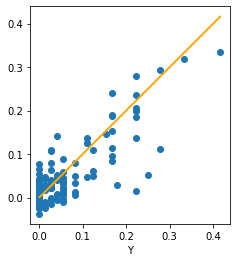

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict90.csv", prediction, delimiter=",")

[[ 0.04533041]
 [ 0.02141406]
 [ 0.0654847 ]
 [ 0.03774963]
 [ 0.03498003]
 [ 0.02985543]
 [ 0.0495291 ]
 [ 0.05866455]
 [ 0.02862909]
 [ 0.2053789 ]
 [ 0.11403702]
 [ 0.07852563]
 [-0.02185245]
 [ 0.18047458]
 [ 0.02915027]
 [ 0.02735967]
 [ 0.28125215]
 [ 0.04031117]
 [ 0.0306842 ]
 [ 0.14956948]
 [ 0.2053182 ]
 [ 0.02793143]
 [ 0.16015992]
 [ 0.04480141]
 [ 0.03837179]
 [ 0.02411992]
 [ 0.02248638]
 [ 0.05417537]
 [ 0.01017709]
 [ 0.01580456]
 [ 0.0468517 ]
 [ 0.10928065]
 [ 0.02410809]
 [ 0.01886649]
 [ 0.0486101 ]
 [ 0.04492322]
 [ 0.0893271 ]
 [ 0.01508125]
 [ 0.02366882]
 [ 0.07780568]
 [ 0.16631609]
 [ 0.04163215]
 [ 0.01253293]
 [ 0.01530358]
 [ 0.02473073]
 [ 0.10892062]
 [ 0.02123373]
 [ 0.05670387]
 [ 0.04895429]
 [ 0.02765857]
 [ 0.05278462]
 [ 0.07707457]
 [ 0.42980954]
 [ 0.11631952]
 [ 0.07159649]
 [ 0.03416077]
 [ 0.00215048]
 [ 0.06650187]
 [ 0.02485181]
 [ 0.05161443]
 [ 0.08129392]
 [ 0.02400452]
 [ 0.02646802]
 [ 0.05290887]
 [ 0.00840581]
 [ 0.05410819]
 [ 0.00368

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Datos%20testeo%20con%2030.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,0:5]
Ytest=dataset2[:,5]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.06925691237013577


-0.557060523647531

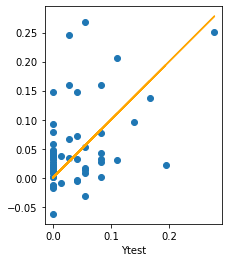

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')

plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

print(Ytest)
np.savetxt("predict10.csv", predict, delimiter=",")



[[ 0.04520506]
 [-0.00813589]
 [ 0.04826777]
 [ 0.00829771]
 [-0.0620404 ]
 [ 0.00090861]
 [ 0.03236233]
 [ 0.09288281]
 [ 0.04444819]
 [ 0.01287857]
 [ 0.03367465]
 [ 0.03613817]
 [ 0.1376218 ]
 [ 0.03052332]
 [ 0.07772389]
 [ 0.01715984]
 [-0.03107679]
 [ 0.03209735]
 [ 0.03762193]
 [ 0.04409924]
 [ 0.00228429]
 [ 0.07122515]
 [ 0.01184503]
 [ 0.06747402]
 [ 0.09692639]
 [ 0.02288555]
 [ 0.02759004]
 [-0.0041196 ]
 [ 0.03367645]
 [ 0.20564856]
 [ 0.03172699]
 [ 0.00840862]
 [ 0.01034264]
 [ 0.01754577]
 [ 0.04203728]
 [ 0.2676915 ]
 [ 0.00166522]
 [ 0.15941763]
 [ 0.03867184]
 [ 0.02699995]
 [ 0.25130928]
 [-0.01467334]
 [ 0.01695496]
 [-0.01247123]
 [ 0.07821546]
 [ 0.0587094 ]
 [-0.01807289]
 [ 0.05298012]
 [ 0.16011837]
 [ 0.0220893 ]
 [ 0.14830422]
 [ 0.24615741]
 [ 0.03929352]
 [ 0.0214986 ]
 [ 0.14830446]
 [-0.00456877]
 [ 0.03384162]]
[0.    0.014 0.    0.056 0.    0.    0.    0.    0.    0.056 0.    0.
 0.167 0.111 0.083 0.    0.056 0.083 0.014 0.    0.083 0.042 0.    0.028
 